In [1]:
from keras_segmentation.models.all_models import model_from_name
import six
from keras_segmentation.data_utils.data_loader import image_segmentation_generator, \
    verify_segmentation_dataset
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint

## loading tensorboard

%load_ext tensorboard

### End to end training of the sample model

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )

In [ ]:
model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_1" , epochs=1
)

In [ ]:
out = model1.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(out)

### Loading a simple model with weights

#### vgg_unet

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model_base = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
#model_base.load_weights('divam_ss_base_weights_ep20.h5')

#### resnet50_segnet

In [2]:
from keras_segmentation.models.segnet import resnet50_segnet

model_base = resnet50_segnet(n_classes=50 ,  input_height=320, input_width=640)
model_base.load_weights('divam_ss_base_weights_r_segnet.19.h5')
#model_pruned.load_weights('divam_ss_pruned_weights_r_segnet19.h5')

In [4]:
import tensorflow_model_optimization as tfmot 

quant_aware_model = tfmot.quantization.keras.quantize_model(model_base)

/home/mohan/virtualenv/divamgupta_tf2/lib/python3.6/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [5]:
quant_aware_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 640, 3) 0                                            
__________________________________________________________________________________________________
quantize_layer (QuantizeLayer)  (None, 320, 640, 3)  3           input_1[0][0]                    
__________________________________________________________________________________________________
quant_zero_padding2d (QuantizeW (None, 326, 646, 3)  1           quantize_layer[1][0]             
__________________________________________________________________________________________________
quant_conv1 (QuantizeWrapperV2) (None, 160, 320, 64) 9601        quant_zero_padding2d[0][0]       
____________________________________________________________________________________________

In [7]:
n_classes = model_base.n_classes
input_height = model_base.input_height
input_width = model_base.input_width
output_height = model_base.output_height
output_width = model_base.output_width

In [ ]:
n_classes = 50
input_height = 320
input_width = 640
output_height = 160
output_width = 320

### Execute this if you are planning to predict or train the network

In [8]:
train_images="dataset1/images_prepped_train/"
train_annotations="dataset1/annotations_prepped_train/"
#input_height=None
#input_width=None
#n_classes=None
verify_dataset=True
checkpoints_path=None
epochs=20
batch_size=2
validate=False
val_images=None
val_annotations=None
val_batch_size=2
auto_resume_checkpoint=False
load_weights=None
steps_per_epoch=512
val_steps_per_epoch=512
gen_use_multiprocessing=False
ignore_zero_class=False
optimizer_name='adam'
do_augment=False
augmentation_name="aug_all",
callbacks=None
custom_augmentation=None
other_inputs_paths=None
preprocessing=None
read_image_type=1

In [9]:
train_gen = image_segmentation_generator(
        train_images, train_annotations,  batch_size,  n_classes,
        input_height, input_width, output_height, output_width,
        do_augment=do_augment, augmentation_name=augmentation_name,
        custom_augmentation=custom_augmentation, other_inputs_paths=other_inputs_paths,
        preprocessing=preprocessing, read_image_type=read_image_type)

In [12]:
import tensorflow 

checkpoints_path = 'divam_ss_q_model_'
default_callback = ModelCheckpoint(
            filepath=checkpoints_path + ".{epoch:02d}.h5",
            save_best_only=True,
            save_weights_only=False,
            verbose=True,
            monitor='loss'
        )
tbCallBack = tensorflow.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)


In [13]:
loss_k = 'categorical_crossentropy'
quant_aware_model.compile(loss=loss_k,
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
import os

logs_base_dir = "./Graph"
os.makedirs(logs_base_dir, exist_ok=True)
#%tensorboard --logdir {logs_base_dir}

In [14]:
initial_epoch=0
quant_aware_model.fit(train_gen, steps_per_epoch=steps_per_epoch,
                  epochs=epochs, callbacks=[default_callback,tbCallBack], initial_epoch=initial_epoch)

Epoch 1/20
512/512 [==============================] - 161s 298ms/step - loss: 0.1196 - accuracy: 0.9606

Epoch 00001: loss improved from inf to 0.11965, saving model to divam_ss_q_model_.01.h5
Epoch 2/20
512/512 [==============================] - 146s 285ms/step - loss: 0.0800 - accuracy: 0.9695

Epoch 00002: loss improved from 0.11965 to 0.08000, saving model to divam_ss_q_model_.02.h5
Epoch 3/20
512/512 [==============================] - 147s 286ms/step - loss: 0.0863 - accuracy: 0.9673

Epoch 00003: loss did not improve from 0.08000
Epoch 4/20
512/512 [==============================] - 147s 286ms/step - loss: 0.0875 - accuracy: 0.9669

Epoch 00004: loss did not improve from 0.08000
Epoch 5/20
512/512 [==============================] - 147s 286ms/step - loss: 0.0852 - accuracy: 0.9676

Epoch 00005: loss did not improve from 0.08000
Epoch 6/20
512/512 [==============================] - 147s 287ms/step - loss: 0.0836 - accuracy: 0.9681

Epoch 00006: loss did not improve from 0.08000
Ep

In [ ]:
model.save_weights('divam_ss_base_weights_ep20.h5')

In [ ]:
tensorboard --logdir path_to_c/Graph 

In [ ]:
out = model_for_pruning.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png"
)

In [ ]:
model.save('dg_base_ep20.h5')

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(out)

In [ ]:
model2=model.load_model('dg_base_ep1.h5')

In [ ]:
model2.summary()

In [15]:
def get_image_array(image_input,
                    width, height,
                    imgNorm="sub_mean", ordering='channels_first', read_image_type=1):
    """ Load image array from input """

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif isinstance(image_input, six.string_types):
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_image_array: path {0} doesn't exist"
                                  .format(image_input))
        img = cv2.imread(image_input, read_image_type)
    else:
        raise DataLoaderError("get_image_array: Can't process input type {0}"
                              .format(str(type(image_input))))

    if imgNorm == "sub_and_divide":
        img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1
    elif imgNorm == "sub_mean":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = np.atleast_3d(img)

        means = [103.939, 116.779, 123.68]

        for i in range(min(img.shape[2], len(means))):
            img[:, :, i] -= means[i]

        img = img[:, :, ::-1]
    elif imgNorm == "divide":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = img/255.0

    if ordering == 'channels_first':
        img = np.rollaxis(img, 2, 0)
    return img

In [18]:
import numpy as np

IMAGE_ORDERING = "channels_last"
x = get_image_array(inp, input_width, input_height,
                    ordering=IMAGE_ORDERING)

In [19]:
pr = quant_aware_model.predict(np.array([x]))[0]
pr_q = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)

In [ ]:
import random

class_colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]

def visualize_segmentation(seg_arr, inp_img=None, n_classes=None,
                           colors=class_colors, class_names=None,
                           overlay_img=False, show_legends=False,
                           prediction_width=None, prediction_height=None):

    if n_classes is None:
        n_classes = np.max(seg_arr)

    seg_img = get_colored_segmentation_image(seg_arr, n_classes, colors=colors)

    if inp_img is not None:
        original_h = inp_img.shape[0]
        original_w = inp_img.shape[1]
        seg_img = cv2.resize(seg_img, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

    if (prediction_height is not None) and (prediction_width is not None):
        seg_img = cv2.resize(seg_img, (prediction_width, prediction_height), interpolation=cv2.INTER_NEAREST)
        if inp_img is not None:
            inp_img = cv2.resize(inp_img,
                                 (prediction_width, prediction_height))

    if overlay_img:
        assert inp_img is not None
        seg_img = overlay_seg_image(inp_img, seg_img)

    if show_legends:
        assert class_names is not None
        legend_img = get_legends(class_names, colors=colors)

        seg_img = concat_lenends(seg_img, legend_img)

    return seg_img

def get_colored_segmentation_image(seg_arr, n_classes, colors=class_colors):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_arr_c = seg_arr[:, :] == c
        seg_img[:, :, 0] += ((seg_arr_c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr_c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr_c)*(colors[c][2])).astype('uint8')

    return seg_img

In [ ]:
overlay_img=False
show_legends=False
class_names=None
prediction_width=None
prediction_height=None

seg_img = visualize_segmentation(pr, inp, n_classes=n_classes,
                                 colors=class_colors, overlay_img=overlay_img,
                                 show_legends=show_legends,
                                 class_names=class_names,
                                 prediction_width=prediction_width,
                                 prediction_height=prediction_height)

In [ ]:
while(True):
    cv2.imshow('im', seg_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

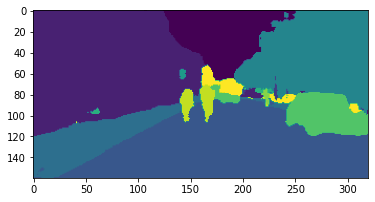

In [20]:
import matplotlib.pyplot as plt
plt.imshow(pr_q)

### Use the below if you are loading the model

In [21]:
from keras_segmentation.models.unet import vgg_unet
from tensorflow.keras.models import load_model

#model = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
#model7_p=load_model('./striped_divam_ss_pruned_ep_model_20_r_segnet.h5')
model_qq=load_model('./divam_ss_q_model_.15.h5')
#model_base=load_model('./dg_base_ep1.h5')
print('done')


ValueError: Unknown layer: QuantizeLayer. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [22]:
quantize_scope = tfmot.quantization.keras.quantize_scope
with quantize_scope():
    model_qq=load_model('./divam_ss_q_model_.15.h5')    

In [ ]:
model_base.summary()

In [17]:
import cv2
inp = cv2.imread("dataset1/images_prepped_test/0016E5_07965.png",1)

### Pruning the model

In [ ]:
import tensorflow_model_optimization as tfmot 
from tensorflow_model_optimization.python.core.sparsity.keras import pruning_schedule as pruning_sched
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
import numpy as np

In [ ]:
num_images = 367
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

#'''

model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model_base, **pruning_params)

In [ ]:
model_for_pruning.summary()

In [ ]:
p_checkpoints_path = 'divam_ss_pruned_weights_r_segnet'
p_checkpoint = ModelCheckpoint(filepath=p_checkpoints_path + "{epoch:02d}.h5",save_weights_only=True,save_best_only=True,
                               monitor='loss',
                              verbose=True)

In [ ]:
log_dir = './pruning_logs'
p_callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    # Log sparsity and other metrics in Tensorboard.
    tfmot.sparsity.keras.PruningSummaries(log_dir=log_dir),p_checkpoint]

In [ ]:
import tensorflow
# Better Model callbacks
log_dir = '.\pruning_logs'
p_callbacks_n = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, profile_batch = 100000000, histogram_freq=0, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch'),
  tfmot.sparsity.keras.PruningSummaries(
    log_dir, update_freq='epoch'
  ), p_checkpoint
]

In [ ]:
loss_k = 'categorical_crossentropy'

model_for_pruning.compile(loss=loss_k,
                      optimizer='adam',
                      metrics=['accuracy'])

In [ ]:
initial_epoch=0
model_for_pruning.fit(train_gen, steps_per_epoch=steps_per_epoch,
                  epochs=epochs, callbacks=p_callbacks_n, initial_epoch=initial_epoch)

In [ ]:
pr = model_for_pruning.predict(np.array([x]))[0]
pr_p1 = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)

In [ ]:
model_for_pruning.save('divam_ss_pruned_ep_model_20_r_segnet.h5')

### Strip pruning to remove the pruning layer names to the default

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)
model_for_export.save('striped_divam_ss_pruned_ep_model_20_r_segnet.h5', include_optimizer=True)

In [ ]:
model_for_pruning.save_weights('divam_ss_pruned_ep_weights_20_new.h5')

### End to end inference from a loaded model

In [ ]:

from keras_segmentation.models.unet import vgg_unet
from tensorflow.keras.models import load_model

#model9 = vgg_unet(n_classes=50 ,  input_height=320, input_width=640  )
model7=load_model('./striped_divam_ss_pruned_ep_model_20_r_segnet.h5')
#model9=load_model('./dg_base_ep1.h5')
print('done')


In [ ]:
import cv2
inp = cv2.imread("dataset1/images_prepped_test/0016E5_07965.png",1)

In [ ]:
n_classes = 50
input_height = 320
input_width = 640
output_height = 160
output_width = 320

In [ ]:
def get_image_array(image_input,
                    width, height,
                    imgNorm="sub_mean", ordering='channels_first', read_image_type=1):
    """ Load image array from input """

    if type(image_input) is np.ndarray:
        # It is already an array, use it as it is
        img = image_input
    elif isinstance(image_input, six.string_types):
        if not os.path.isfile(image_input):
            raise DataLoaderError("get_image_array: path {0} doesn't exist"
                                  .format(image_input))
        img = cv2.imread(image_input, read_image_type)
    else:
        raise DataLoaderError("get_image_array: Can't process input type {0}"
                              .format(str(type(image_input))))

    if imgNorm == "sub_and_divide":
        img = np.float32(cv2.resize(img, (width, height))) / 127.5 - 1
    elif imgNorm == "sub_mean":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = np.atleast_3d(img)

        means = [103.939, 116.779, 123.68]

        for i in range(min(img.shape[2], len(means))):
            img[:, :, i] -= means[i]

        img = img[:, :, ::-1]
    elif imgNorm == "divide":
        img = cv2.resize(img, (width, height))
        img = img.astype(np.float32)
        img = img/255.0

    if ordering == 'channels_first':
        img = np.rollaxis(img, 2, 0)
    return img

In [ ]:
import numpy as np

IMAGE_ORDERING = "channels_last"
x = get_image_array(inp, input_width, input_height,
                    ordering=IMAGE_ORDERING)

In [24]:
pr = model_qq.predict(np.array([x]))[0]
pr_p = pr.reshape((output_height,  output_width, n_classes)).argmax(axis=2)

In [ ]:
pr

In [ ]:
import random

class_colors = [(random.randint(0, 255), random.randint(
    0, 255), random.randint(0, 255)) for _ in range(5000)]

def visualize_segmentation(seg_arr, inp_img=None, n_classes=None,
                           colors=class_colors, class_names=None,
                           overlay_img=False, show_legends=False,
                           prediction_width=None, prediction_height=None):

    if n_classes is None:
        n_classes = np.max(seg_arr)

    seg_img = get_colored_segmentation_image(seg_arr, n_classes, colors=colors)

    if inp_img is not None:
        original_h = inp_img.shape[0]
        original_w = inp_img.shape[1]
        seg_img = cv2.resize(seg_img, (original_w, original_h), interpolation=cv2.INTER_NEAREST)

    if (prediction_height is not None) and (prediction_width is not None):
        seg_img = cv2.resize(seg_img, (prediction_width, prediction_height), interpolation=cv2.INTER_NEAREST)
        if inp_img is not None:
            inp_img = cv2.resize(inp_img,
                                 (prediction_width, prediction_height))

    if overlay_img:
        assert inp_img is not None
        seg_img = overlay_seg_image(inp_img, seg_img)

    if show_legends:
        assert class_names is not None
        legend_img = get_legends(class_names, colors=colors)

        seg_img = concat_lenends(seg_img, legend_img)

    return seg_img

def get_colored_segmentation_image(seg_arr, n_classes, colors=class_colors):
    output_height = seg_arr.shape[0]
    output_width = seg_arr.shape[1]

    seg_img = np.zeros((output_height, output_width, 3))

    for c in range(n_classes):
        seg_arr_c = seg_arr[:, :] == c
        seg_img[:, :, 0] += ((seg_arr_c)*(colors[c][0])).astype('uint8')
        seg_img[:, :, 1] += ((seg_arr_c)*(colors[c][1])).astype('uint8')
        seg_img[:, :, 2] += ((seg_arr_c)*(colors[c][2])).astype('uint8')

    return seg_img

In [ ]:
overlay_img=False
show_legends=False
class_names=None
prediction_width=None
prediction_height=None

seg_img = visualize_segmentation(pr, inp, n_classes=n_classes,
                                 colors=class_colors, overlay_img=overlay_img,
                                 show_legends=show_legends,
                                 class_names=class_names,
                                 prediction_width=prediction_width,
                                 prediction_height=prediction_height)

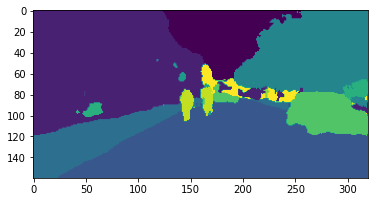

In [25]:
import matplotlib.pyplot as plt
plt.imshow(pr_p)